# Imports and Functions

In [ ]:
!pip install seaborn==0.9.0

In [1]:
import os 
import math
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
circuits = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/circuits.csv', engine='python')
constructorResults = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/constructorResults.csv')
constructorStandings = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/constructorStandings.csv')
constructors = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/constructors.csv')
driverStandings = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/driverStandings.csv')
drivers = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/drivers.csv')
lapTimes = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/lapTimes.csv')
pitStops = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/pitStops.csv')
qualifying = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/qualifying.csv')
races = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/races.csv')
results = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/results.csv')
seasons = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/seasons.csv')
status = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/status.csv')

In [6]:
#To see groupby objects
#for key, item in podium:
#    print(podium.get_group(key), "\n\n")

def merge(cols,lists):
    data = lists[0][cols[0]].copy()
    for i in range(len(lists)-1):
        data = data.merge(lists[i+1][cols[i+1]])
    return data

def to_minutes(sec):
    time = []
    for i in sec:
        minutes, seconds = divmod(i / 1000, 60)
        time.append(f'{minutes:0>2.0f}:{seconds:.3f}')
    return time

# DAM EDA questions:

- grid position analysis
- Best "getaway" grid start position

### Which is the nationality that produces the best performing F1 cars?

Output: nationality

In [7]:
cols = [['raceId','constructorId','points'],
        ['constructorId','nationality'],
        ['raceId','year','circuitId'],
        ['circuitId','name']]
lists = [constructorResults,constructors,races,circuits]
data = merge(cols,lists)

In [8]:
nationality = data
nationality.head()

,raceId,constructorId,points,nationality,year,circuitId,name
0,18,1,14.0,British,2008,1,Albert Park Grand Prix Circuit
1,18,2,8.0,German,2008,1,Albert Park Grand Prix Circuit
2,18,3,9.0,British,2008,1,Albert Park Grand Prix Circuit
3,18,4,5.0,French,2008,1,Albert Park Grand Prix Circuit
4,18,5,2.0,Italian,2008,1,Albert Park Grand Prix Circuit


In [9]:
nationality.describe()

,raceId,constructorId,points,year,circuitId
count,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000
mean,456.399479,41.252378,3.192649,1990.699605,21.238916
std,261.142210,52.778298,6.406738,15.354330,15.232607
min,1.000000,1.000000,0.000000,1956.000000,1.000000
25%,259.250000,6.000000,0.000000,1979.000000,9.000000
50%,440.000000,23.000000,0.000000,1990.000000,18.000000
75%,628.000000,50.000000,4.000000,2004.000000,30.000000
max,988.000000,210.000000,66.000000,2017.000000,73.000000


no missing data

In [10]:
#groupby nationality and name to see how well each nationality did on each track
#hybrid_mean = hybrid.groupby(['nationality','name'])['points'].mean()

nationality = nationality.groupby('nationality')
nationality = nationality['points'].agg([np.sum, np.mean, 'count']).reset_index().sort_values(['mean'], ascending = False)

In [11]:
nationality

,nationality,sum,mean,count
2,Austrian,3888.5,15.871429,245
9,German,4082.0,11.092391,368
11,Indian,987.0,5.167539,191
13,Italian,8624.0,3.471820,2484
5,British,14466.5,2.751855,5257
8,French,1993.0,1.938716,1028
14,Japanese,447.5,1.609712,278
22,Swiss,509.0,1.332461,382
6,Canadian,79.0,1.215385,65
12,Irish,291.0,1.164000,250


In [12]:
nationality.dtypes

nationality     object
sum            float64
mean           float64
count            int64
dtype: object

In [13]:
nationality['mean'] = nationality['mean'].apply(lambda x: float("{:.2f}".format(x)))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


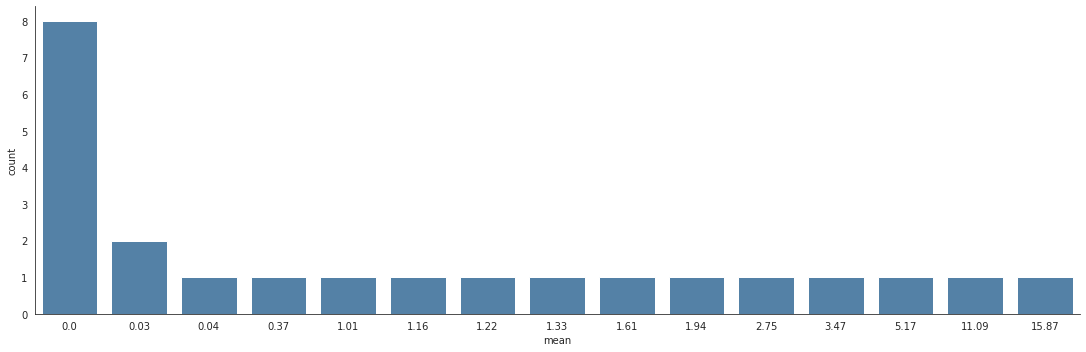

In [14]:
with sns.axes_style('white'):
    g = sns.factorplot("mean", data=nationality, aspect=3, 
                       kind="count", color='steelblue')
    g.set_xticklabels(step=1)

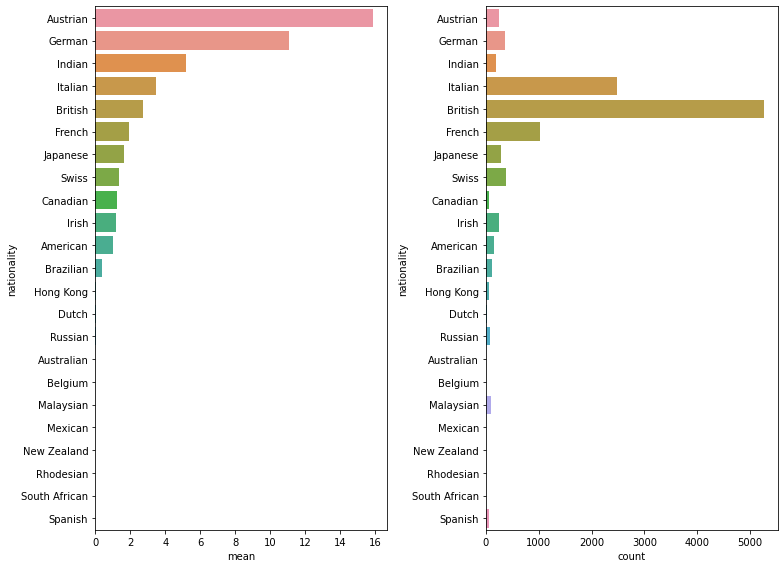

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 8))
sns.barplot(ax=ax[0], x="mean", y="nationality", data=nationality, orient="h")
sns.barplot(ax=ax[1], x="count", y="nationality", data=nationality, orient="h")
fig.tight_layout()

Austrian and german produce the best performing f1 cars. 

### Which F1 drivers have the most podium finishes in their career?
Output: podium


In [37]:
cols = [['raceId','driverId','position'],
        ['driverId','driverRef'],
        ['raceId','year','circuitId'],
        ['circuitId','name']]
lists = [driverStandings,drivers,races,circuits]
data = merge(cols,lists)

In [38]:
podium = data.loc[data['position'] <= 3]

podium = podium.groupby(['driverRef'])['position'].count().reset_index().sort_values(['position'], ascending = False)
podium.columns = ['driverRef', 'podiums']

career = data.groupby('driverRef')['year'].agg(['min', 'max', 'count']).reset_index()

podium = podium.merge(career)
podium['podium_ratio'] = podium['podiums']/podium['count']

In [39]:
podium = podium.rename(columns={"driverRef": "driver", "min": "earliest_year", "max": "latest_year", "count": "total_race"})

In [40]:
podium.head()

,driver,podiums,earliest_year,latest_year,total_race,podium_ratio
0,michael schumacher,203,1991,2012,312,0.650641
1,hamilton,144,2007,2017,207,0.695652
2,prost,140,1980,1993,204,0.686275
3,vettel,120,2007,2017,198,0.606061
4,alonso,118,2001,2017,295,0.400000


In [41]:
podium.describe()

,podiums,earliest_year,latest_year,total_race,podium_ratio
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,25.241379,1973.413793,1982.198276,121.612069,0.184444
std,34.267647,19.605265,20.926879,73.810895,0.177860
min,1.000000,1950.000000,1951.000000,12.000000,0.005952
25%,2.000000,1955.750000,1962.500000,62.750000,0.038280
50%,14.000000,1971.500000,1980.000000,115.500000,0.133280
75%,32.000000,1991.000000,2000.250000,166.500000,0.273990
max,203.000000,2015.000000,2017.000000,316.000000,0.731343


In [45]:
podium_count = podium.reset_index().sort_values(['podiums'], ascending = False)

In [46]:
podium_count.head()

,index,driver,podiums,earliest_year,latest_year,total_race,podium_ratio
0,0,michael schumacher,203,1991,2012,312,0.650641
1,1,hamilton,144,2007,2017,207,0.695652
2,2,prost,140,1980,1993,204,0.686275
3,3,vettel,120,2007,2017,198,0.606061
4,4,alonso,118,2001,2017,295,0.400000


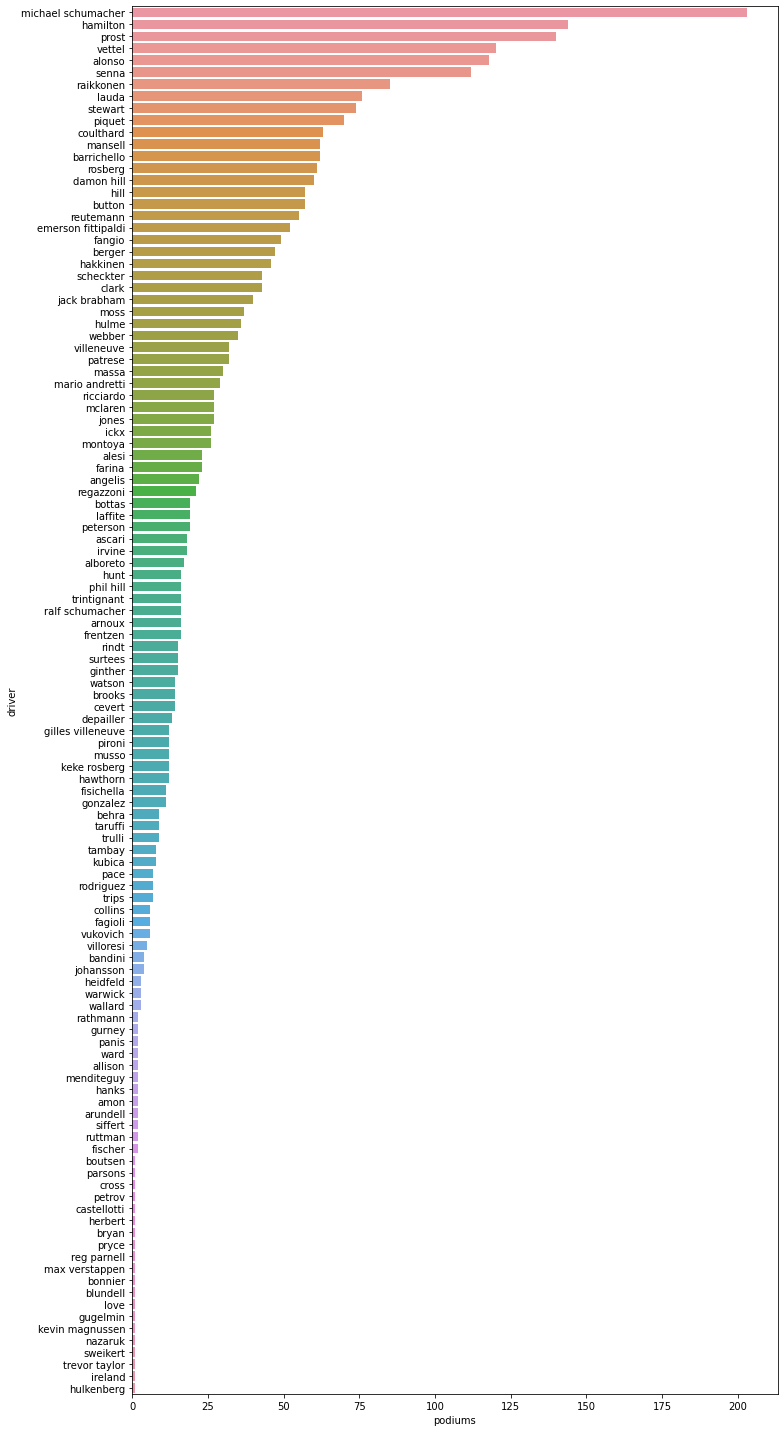

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 20))
sns.barplot(ax=ax, x="podiums", y="driver", data=podium_count, orient="h")
fig.tight_layout()

According to the most podium finishes data, michael schumacher, has the most number of finishes.

In [48]:
podium_ratio = podium.reset_index().sort_values(['podium_ratio'], ascending = False)

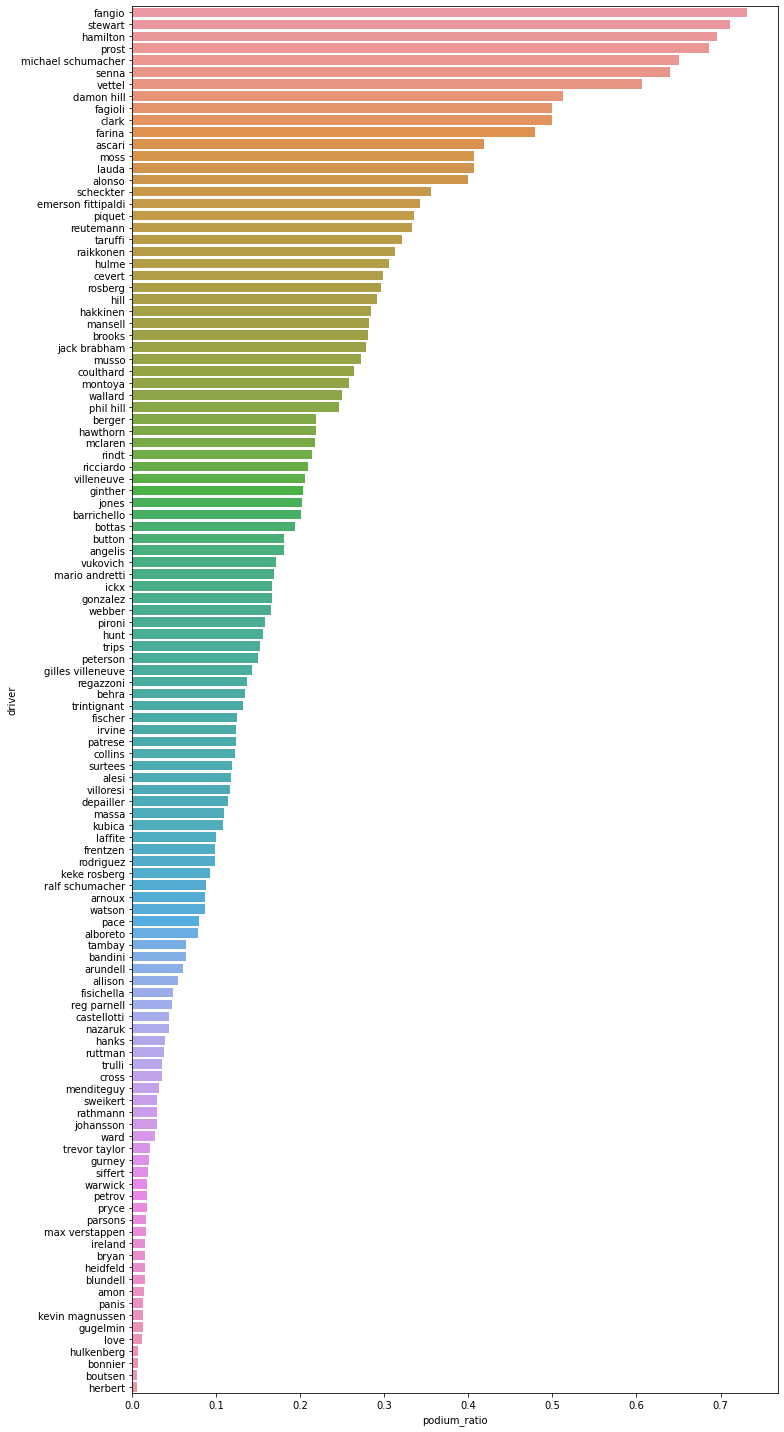

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 20))
sns.barplot(ax=ax, x="podium_ratio", y="driver", data=podium_ratio, orient="h")
fig.tight_layout()

In [ ]:
podium_ratio.head(3)

,index,driver,podiums,earliest_year,latest_year,total_race,podium_ratio
19,19,fangio,49,1950,1958,67,0.731343
8,8,stewart,74,1965,1973,104,0.711538
1,1,hamilton,144,2007,2017,207,0.695652


However, we calculated the ratio with:

### number of podium finishes / total race

we can tell that fangio AKA Juan Manuel Fangio has the highest ratio of 0.731

The top 3 drivers are:
fangio, stewart and hamilton

This data isn't too far fetch from what we have already known!



### Which circuits have the highest overtaking frequency? (more chances for drivers to improve grid position during the race)?
Output: overtake









In [ ]:
data = lapTimes.groupby('raceId')
count = []

for i in data:
    freq = -1
    race = i[1].groupby('lap')
    for j in race:
        position = j[1]['position']
        if (freq == -1):
            diff = 1
        else:
            diff = (position.reset_index()['position']-prev.reset_index()['position']).abs().sum()
        prev = position
        freq += diff
    count.append(freq)

In [ ]:
overtake = data.count().reset_index()
overtake['freq'] = count

cols = [['raceId','freq'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [overtake,races,circuits]
overtake = merge(cols,lists)

overtake = overtake.groupby('name')
overtake['freq'].agg([np.mean, 'count']).reset_index().sort_values(['mean'], ascending = False)

,name,mean,count
18,Fuji Speedway,626.500000,2
28,Shanghai International Circuit,567.071429,14
9,Baku City Circuit,551.500000,2
24,Marina Bay Street Circuit,531.600000,10
0,A1-Ring,510.857143,7
4,Autodromo Jose Carlos Pace,510.818182,22
5,Autodromo Juan y Oscar Galvez,510.666667,3
8,Bahrain International Circuit,508.076923,13
17,Circuito de Jerez,504.000000,1
29,Silverstone Circuit,494.090909,22


In [ ]:
data = lapTimes[['raceId','lap','position']].merge(races[['raceId','year']])
data = data.loc[data['year'] >= 2014]
data = data.groupby('raceId')

count = []

for i in data:
    freq = -1
    race = i[1].groupby('lap')
    for j in race:
        position = j[1]['position']
        if (freq == -1):
            diff = 1
        else:
            diff = (position.reset_index()['position']-prev.reset_index()['position']).abs().sum()
        prev = position
        freq += diff
    count.append(freq)

overtake = data.count().reset_index()
overtake['freq'] = count

cols = [['raceId','freq'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [overtake,races,circuits]
overtake = merge(cols,lists)

overtake = overtake.groupby('name')
#overtakep['freq'].mean().reset_index().sort_values(['freq'], ascending = False)
overtake['freq'].agg([np.mean, 'count']).reset_index().sort_values(['mean'], ascending = False)

,name,mean,count
11,Hockenheimring,619.500000,2
9,Circuit de Spa-Francorchamps,615.250000,4
5,Baku City Circuit,551.500000,2
2,Autodromo Jose Carlos Pace,532.500000,4
16,Shanghai International Circuit,498.000000,4
4,Bahrain International Circuit,487.250000,4
20,Yas Marina Circuit,477.500000,4
12,Hungaroring,464.000000,4
19,Suzuka Circuit,443.000000,4
13,Marina Bay Street Circuit,442.500000,4


### What is the average lap speed/lap times for each circuit? (determine the top 3 fastest circuits in the calendar)
Output: laptime

In [ ]:
laptime = lapTimes.groupby('raceId')['milliseconds'].mean().reset_index()
distance = lapTimes.groupby('raceId')['lap'].max().reset_index()

#race length is defined as the smallest number of complete laps that exceeds 305 km
distance['distance'] = 305/distance['lap']
distance = distance.merge(races[['raceId','circuitId']])

#monaco grand prix set at 260.5 km instead of 305km
distance.loc[distance['circuitId'] == 6, ['distance']] = 260.5/distance['lap']

laptime['speed'] = distance['distance']

cols = [['raceId','milliseconds','speed'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [laptime,races,circuits]
laptime = merge(cols,lists)

laptime = laptime.groupby('name')['milliseconds'].mean().reset_index().sort_values(['milliseconds']).rename(columns = {'milliseconds': 'time'})
laptime['time'] = to_minutes(laptime['time'])
laptime

,raceId,milliseconds,speed
0,1,97427.745274,5.258621
1,2,109763.157040,9.838710
2,3,128685.079179,5.446429
3,4,97834.824889,5.350877
4,5,89878.926752,4.621212
...,...,...,...
390,984,100707.127828,5.754717
391,985,102314.033226,5.446429
392,986,83242.022041,4.295775
393,987,78541.676949,4.295775


,raceId,lap,distance,circuitId
0,1,58,5.258621,1
1,2,31,9.838710,2
2,3,56,5.446429,17
3,4,57,5.350877,3
4,5,66,4.621212,4
...,...,...,...,...
390,984,53,5.754717,22
391,985,56,5.446429,69
392,986,71,4.295775,32
393,987,71,4.295775,18


### Did the F1 cars get slower after the hybrid era (2014)?
or isit 2009

Output: hybrid

In [ ]:
data = lapTimes.groupby('raceId')['milliseconds'].mean().reset_index()

cols = [['raceId','milliseconds'],
        ['raceId','year','circuitId'],
        ['circuitId','name']]
lists = [data,races,circuits]
data = merge(cols,lists)

In [ ]:
yoc = 2014
hybrid_before = data.loc[data['year'] < yoc]
hybrid_after = data.loc[data['year'] >= yoc]

hybrid_before = hybrid_before.groupby('name')['milliseconds'].mean().reset_index().rename(columns = {'milliseconds': 'before'})
hybrid_after = hybrid_after.groupby('name')['milliseconds'].mean().reset_index().rename(columns = {'milliseconds': 'after'})

hybrid = hybrid_before.merge(hybrid_after)
hybrid['change_ms'] = hybrid['after'] - hybrid['before']
hybrid['before'] = to_minutes(hybrid['before'])
hybrid['after'] = to_minutes(hybrid['after'])

In [ ]:
hybrid

,name,before,after,change_ms
0,Albert Park Grand Prix Circuit,01:38.147,01:41.037,2890.014875
1,Autodromo Jose Carlos Pace,01:23.027,01:37.032,14005.405444
2,Autodromo Nazionale di Monza,01:30.421,01:29.872,-548.909284
3,Bahrain International Circuit,01:41.491,01:42.128,637.196131
4,Circuit Gilles Villeneuve,01:32.204,01:21.887,-10316.519232
5,Circuit de Barcelona-Catalunya,01:29.026,01:32.950,3923.393660
6,Circuit de Monaco,01:29.160,01:26.781,-2378.847039
7,Circuit de Spa-Francorchamps,02:1.944,02:4.309,2364.999529
8,Circuit of the Americas,01:46.359,01:49.731,3371.466728
9,Hockenheimring,01:33.547,01:24.168,-9379.034238


### which tracks have the highest frequency of collisions and accidents?
Output: collision

In [ ]:
cols = [['raceId','statusId'],
        ['statusId','status'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [results,status,races,circuits]
data = merge(cols,lists)

#status['status'].unique()
list_accident = ['Accident','Collision']

collision = data.loc[data['status'].isin(list_accident)]
collision = collision.groupby('name')['status'].count().reset_index().sort_values(['status'], ascending = False)

In [ ]:
collision

,name,status
24,Circuit de Monaco,186
27,Circuit de Spa-Francorchamps,93
11,Autodromo Nazionale di Monza,89
50,Nurburgring,85
19,Circuit Gilles Villeneuve,84
...,...,...
57,Riverside International Raceway,1
34,Fair Park,1
60,Sebring International Raceway,1
14,Baku City Circuit,1


### Do constructors and drivers perform better in their home country?

In [ ]:
#have to manually match circuits.location to drivers.nationality and constructors.nationality

### Drivers performance/consistency
Output: consistency

In [ ]:
#driver laptime standard deviation on each track?
cols = [['raceId','driverId','milliseconds'],
        ['driverId','driverRef'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [lapTimes,drivers,races,circuits]
data = merge(cols,lists)

consistency = data.groupby(['name','driverRef'])['milliseconds'].std().reset_index()
consistency = consistency.groupby('driverRef')['milliseconds'].mean().reset_index().sort_values(['milliseconds'])

In [ ]:
consistency

,driverRef,milliseconds
62,lavaggi,5431.707683
12,brendon hartley,6761.459181
8,berger,7078.316930
74,merhi,7393.595881
34,gasly,7455.522164
...,...,...
56,kobayashi,68638.752010
38,grassi,69391.382454
47,ide,70612.045782
67,markus winkelhock,362530.287546


### Pitstops analysis for each track


*   avg number of pitstops for each track
*   avg time taken for each track
*   avg lap for first pitstop and ...


In [ ]:
cols = [['raceId','driverId','stop','lap','milliseconds'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [pitStops,races,circuits]
data = merge(cols,lists)

In [ ]:
avg_pitstop = data.groupby(['raceId','driverId','name'])['stop'].max().reset_index()
avg_pitstop = avg_pitstop.groupby('name')['stop'].mean().reset_index().sort_values(['stop'], ascending = False)

In [ ]:
avg_pitstop

,name,stop
14,Istanbul Park,3.565217
2,Autodromo Jose Carlos Pace,2.920863
16,Marina Bay Street Circuit,2.910959
20,Shanghai International Circuit,2.709459
8,Circuit de Barcelona-Catalunya,2.709459
13,Hungaroring,2.701987
19,Sepang International Circuit,2.654930
4,Bahrain International Circuit,2.629032
12,Hockenheimring,2.611940
17,Nurburgring,2.465116
